# Outlier Detection Using Z-Scores and KMeans Clustering

In this notebook, I will demonstrate how to detect outliers in a dataset using Z-scores, with the help of KMeans clustering. We will generate synthetic data, apply clustering to segment it into two groups, and then use the Z-score method to identify outliers within each cluster. The Z-score measures how many standard deviations a data point is from the mean, and points with a Z-score greater than 3 are typically considered outliers.


### Libraries Overview:
- `numpy`: For numerical operations
- `matplotlib` & `seaborn`: For visualizations
- `pandas`: For data manipulation
- `sklearn.datasets`: To generate synthetic data
- `sklearn.preprocessing`: For data scaling (StandardScaler)
- `sklearn.cluster`: For KMeans clustering


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

### Data Generation:
I generated a synthetic dataset of 1000 samples with two centers and added 4 outliers with random coordinates along with the existing outliners that the data may have to simulate a real-world scenario where data may contain anomalous points.


In [11]:
# Generate synthetic dataset with 2 clusters and 1000 samples
scaler = StandardScaler()
X, _ = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)

# Adding some outliers to the dataset
n_outliers = 4
outliers_X = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

# Combine the generated data with the outliers
X_combined = np.concatenate([X, outliers_X])

# Create a DataFrame for easy manipulation and visualization
df = pd.DataFrame(X_combined, columns=['X1', 'X2'])
df.head()

,X1,X2
0,-1.673506,7.884579
1,6.317580,1.419581
2,3.543604,0.533119
3,5.162714,1.399470
4,4.459399,5.166277


### Visualization:
The plot shows the data distribution with the outliers. At this stage, the outliers are not yet identified, but they appear to be distant from the main clusters, which we will address next.

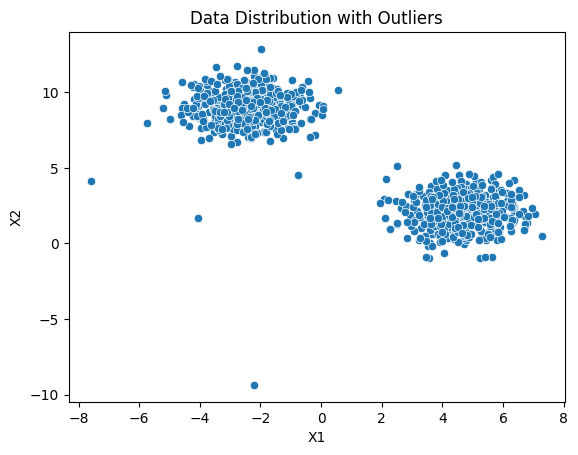

In [12]:
# Visualizing the synthetic data before clustering
sns.scatterplot(data=df, x="X1", y="X2")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Distribution with Outliers')
plt.show()

### KMeans Clustering:
We will apply KMeans clustering with 2 clusters on the dataset. The results are stored in a new column `Y` in the DataFrame, which assigns each point to a cluster. Now, we'll visualize the clustered data.

In [14]:
# Apply KMeans clustering to the data
kmeans = KMeans(n_clusters=2, random_state=42)
df['Y'] = kmeans.fit_predict(df[['X1', 'X2']])

# Display the first few rows of the clustered dataset
df.head()

,X1,X2,Y
0,-1.673506,7.884579,0
1,6.317580,1.419581,1
2,3.543604,0.533119,1
3,5.162714,1.399470,1
4,4.459399,5.166277,1


### Cluster Visualization:
Here, we visualized the dataset with clusters colored based on the KMeans results. The clusters have been successfully formed, but outliers are still present in both clusters.

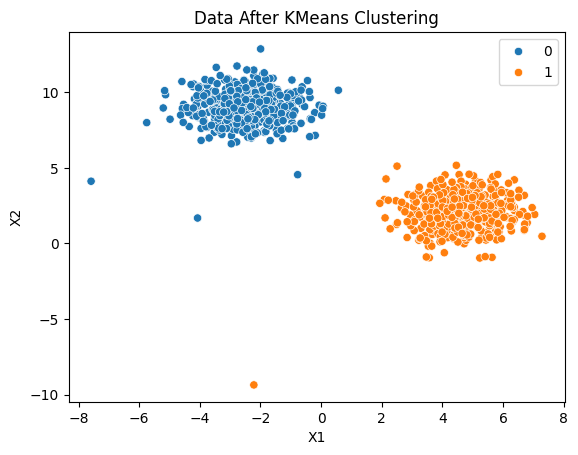

In [16]:
# Visualize the clusters
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", palette="tab10")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data After KMeans Clustering')
plt.legend()
plt.show()

### Z-Score Outlier Detection:
For each cluster, we calculate the Z-scores for both features (X1 and X2). Any points with a Z-score greater than 3 are considered outliers. Here, I printed the detected outliers for each cluster.

In [19]:
# Split the dataset into two clusters based on the 'Y' label
c1 = df.query("Y == 0")
c2 = df.query("Y == 1")

# Only take the features (X1, X2) for Z-score calculation
c1 = c1.iloc[:, :2]
c2 = c2.iloc[:, :2]

# Standardizing the data using StandardScaler
zC1 = np.abs(scaler.fit_transform(c1))
zC2 = np.abs(scaler.fit_transform(c2))

# Detect outliers in each cluster using Z-score > 3
outC1 = (zC1[:, 0] > 3) | (zC1[:, 1] > 3)
outC2 = (zC2[:, 0] > 3) | (zC2[:, 1] > 3)

# Output the detected outliers
print("Outliers in Cluster 1:\n", c1[outC1])
print("\n")
print("Outliers in Cluster 2:\n", c2[outC2])

Outliers in Cluster 1:
             X1         X2
85   -5.750465   7.989898
147   0.569683  10.133861
479  -1.994150  12.867018
1001 -4.073855   1.678084
1002 -7.586077   4.112832
1003 -0.772721   4.545667


Outliers in Cluster 2:
             X1        X2
1000 -2.217728 -9.365562


### Final Visualization:
This plot shows the clusters, with the detected outliers marked using red and green 'X' markers. I also added vertical and horizontal lines to indicate the means of each cluster. This provides a visual confirmation of the outliers in relation to the cluster centers.

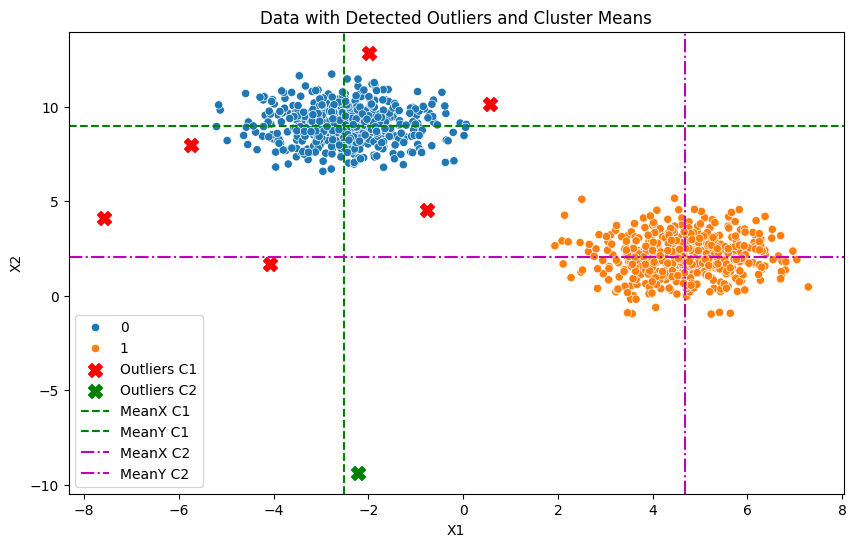

In [20]:
# Visualizing the data with identified outliers
plt.figure(figsize=(10, 6))

# Plot the data points with clusters
sns.scatterplot(data=df, x="X1", y="X2", hue="Y", palette="tab10")

# Highlight outliers from each cluster
outliers_c1 = c1[outC1]
outliers_c2 = c2[outC2]

plt.scatter(outliers_c1["X1"], outliers_c1["X2"], label='Outliers C1', color="r", marker='X', s=100)
plt.scatter(outliers_c2["X1"], outliers_c2["X2"], label='Outliers C2', color="g", marker='X', s=100)

# Plot the means of the clusters for reference
plt.axvline(c1["X1"].mean(), color='g', linestyle='--', label='MeanX C1')
plt.axhline(c1["X2"].mean(), color='g', linestyle='--', label='MeanY C1')
plt.axvline(c2["X1"].mean(), color='m', linestyle='-.', label='MeanX C2')
plt.axhline(c2["X2"].mean(), color='m', linestyle='-.', label='MeanY C2')

# Adding labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data with Detected Outliers and Cluster Means')
plt.legend()
plt.show()

# Conclusion

In this notebook, I applied the Z-score method for outlier detection within clusters obtained using KMeans. The key steps included:
1. Generating synthetic data with outliers.
2. Applying KMeans clustering to group the data.
3. Using Z-scores to identify outliers within each cluster.

Outlier detection can be a critical step in many machine learning tasks, and this method is effective for identifying anomalous points in clustered data.